In [3]:
import numpy as np
import basix
import matplotlib.pyplot as plt
from basix import CellType, ElementFamily, LagrangeVariant, LatticeType
import jax_pn
%load_ext autoreload
%autoreload 2

In [4]:
factor = 3.0
m_cm = 1/100
water = (np.array([15.2090, 24.4140]) * m_cm,
         np.array([[[5.5069 , 0.0   ],
                  [6.6227, 11.4080]],
                  [[3.4757 /factor,  0.0    /factor],
                   [3.7043 /factor,  6.7420 /factor]]]) * m_cm)

iron = (np.array([30.3110, 26.8760]) * m_cm,
        np.array([[[18.250, 0.0   ],
                   [6.4496, 21.3570]],
                  [[13.0890  /factor ,  0.0  /factor],
                   [-0.010523/factor ,7.0373 /factor]]]) * m_cm
)

void = (np.array([0.0, 0.0]),
        np.array([[[0.0, 0.0],
                   [0.0, 0.0]],
                  [[0.0, 0.0],    
                   [0.0, 0.0]]]))

source = np.array([0.097702, 0.45451])
zero_source = np.array([0.0, 0.0])

In [36]:

lagrange    = basix.create_element(ElementFamily.P, CellType.interval, degree= 5, lagrange_variant= LagrangeVariant.gll_warped)
N_max = 5

regions = [
    (20, *water, zero_source), 
    (10, *water, source ),
    (50, *water, zero_source),
    (20, *iron,  zero_source),
    (10, *void, zero_source),
    (10, *water, zero_source),
    (10, *void,  zero_source)
]
elements_per_cm = 10


In [37]:
adpn_prob = jax_pn.ADPN.ADPN_Problem.from_regions_per_cm(regions, elements_per_cm, N_max, lagrange, L_scat=1)
adpn_prob.Solve_Multigroup_System("vacuum", 2)

pn_prob = jax_pn.PN.PN_Problem.from_regions_per_cm(regions, elements_per_cm, N_max, lagrange, L_scat =1)
pn_prob.Solve_Multigroup_System("vacuum", 2)

Solving system with shape: (78024, 78024) and 78024 equations.
Solving system with shape: (78012, 78012) and 78012 equations.


array([8.34616845e-03, 8.53516242e-03, 8.72502076e-03, ...,
       7.67467217e-09, 7.67467217e-09, 7.67467217e-09], shape=(78012,))

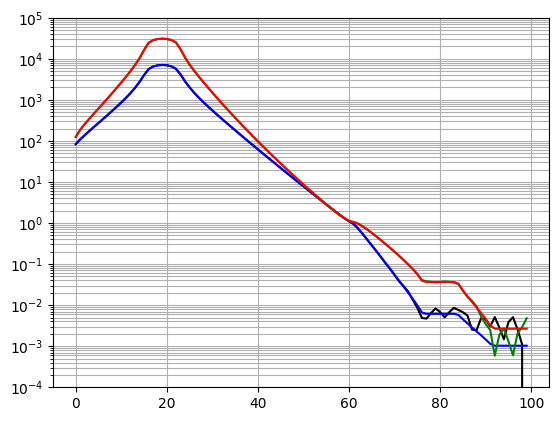

In [38]:
plt.semilogy(1e4 *(adpn_prob.interpolate_solution(np.linspace(0,130, 100), energy_group = 0, k = 0)),'k')
plt.semilogy(1e4 *(pn_prob.interpolate_solution(np.linspace(0,130, 100), energy_group = 0, k = 0)),'b')

plt.semilogy(1e4 *(adpn_prob.interpolate_solution(np.linspace(0,130, 100), energy_group = 1, k = 0)),'g')
plt.semilogy(1e4 *(pn_prob.interpolate_solution(np.linspace(0,130, 100), energy_group = 1, k = 0)),'r')
plt.ylim(1e-4,1e5)
plt.grid(which='both')

In [ ]:
print(adpn_prob.Assemble_Downscatter_Matrix(1,0))
print(pn_prob.Assemble_Downscatter_Matrix(1,0))

(Array([-0.00147171,  0.00018396, -0.00042925, ...,  0.        ,
       -0.        , -0.        ], dtype=float32), Array([   0,    0,    0, ..., 8327, 8327, 8327], dtype=int32), Array([   0,    1,  261, ..., 8325, 8326, 8327], dtype=int32), (8336, 8336))
(array([-0.00147171,  0.00018396, -0.00042925, ...,  0.00018674,
       -0.00021342, -0.00149392], shape=(10564,)), array([   0,    0,    0, ..., 2021, 2021, 2021],
      shape=(10564,), dtype=int32), array([   0,    1,  261, ..., 2019, 2020, 2021],
      shape=(10564,), dtype=int32), (8328, 8328))


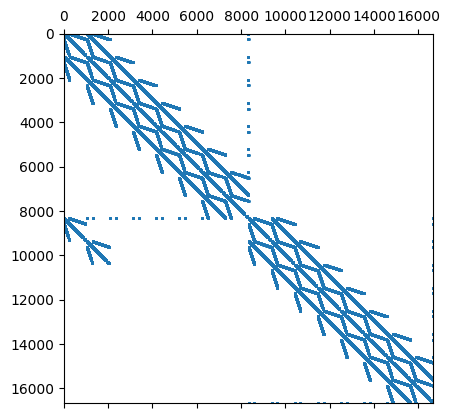

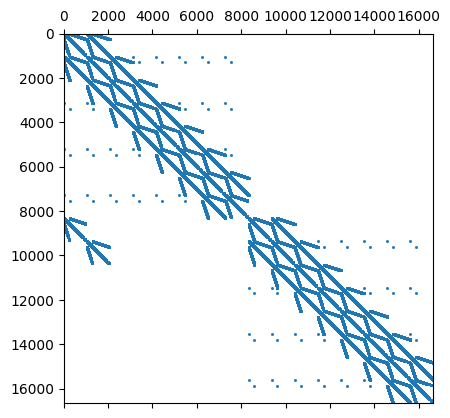

In [ ]:
plt.spy(adpn_prob.assemble_multigroup_system("vacuum", 2)[0], markersize=1)
plt.figure()
plt.spy(pn_prob.assemble_multigroup_system("vacuum", 2)[0], markersize=1)

In [ ]:
raise ValueError("This is a test file, not meant to be run directly. Please use the Jupyter notebook for testing.")

ValueError: This is a test file, not meant to be run directly. Please use the Jupyter notebook for testing.

In [ ]:
dpn_prob = jax_pn.DPN.DPN_Problem.from_regions_per_cm(regions, elements_per_cm, N_max, lagrange, L_scat=1)
dpn_prob.Solve_Multigroup_System("vacuum", 2)

Solving system with shape: (33312, 33312) and 33312 equations.


array([1.65080838e-02, 1.79472873e-02, 1.95014432e-02, ...,
       4.91923320e-11, 4.91923320e-11, 4.91923320e-11], shape=(33312,))

In [ ]:
pn_prob = jax_pn.PN.PN_Problem.from_regions_per_cm(regions, elements_per_cm, N_max, lagrange, L_scat =1)
pn_prob.Solve_Multigroup_System("vacuum", 2)

Solving system with shape: (16656, 16656) and 16656 equations.


array([ 8.31967596e-03,  9.28293508e-03,  1.02716700e-02, ...,
       -3.73731498e-09, -3.73731498e-09, -3.73731498e-09], shape=(16656,))

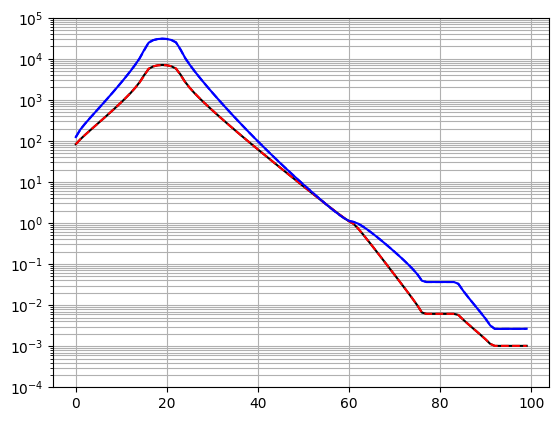

In [ ]:
plt.semilogy(1e4 *(pn_prob.interpolate_solution(np.linspace(0,130, 100), energy_group = 0, k = 0)),'k')
plt.semilogy(1e4 *(pn_prob.interpolate_solution(np.linspace(0,130, 100), energy_group = 1, k = 0)),'b')


plt.semilogy(1e4 * 0.5 *(dpn_prob.interpolate_solution(np.linspace(0,130, 100), energy_group = 0, mu_sign = 1, k = 0) + dpn_prob.interpolate_solution(np.linspace(0,130, 100), energy_group = 0, mu_sign = -1, k = 0)),'r--')
plt.semilogy(1e4 * 0.5 *(dpn_prob.interpolate_solution(np.linspace(0,130, 100), energy_group = 1, mu_sign = 1, k = 0) + dpn_prob.interpolate_solution(np.linspace(0,130, 100), energy_group = 1, mu_sign = -1, k = 0)),'b--')

plt.ylim(1e-4,1e5)
plt.grid(which='both')

In [ ]:
plt.figure(figsize=(10, 10))
plt.spy(pn_prob.assemble_multigroup_system("marshak",2)[0], markersize=0.4)


ValueError: Unknown boundary condition: marshak. Supported: 'reflective', 'vacuum'.

<Figure size 1000x1000 with 0 Axes>

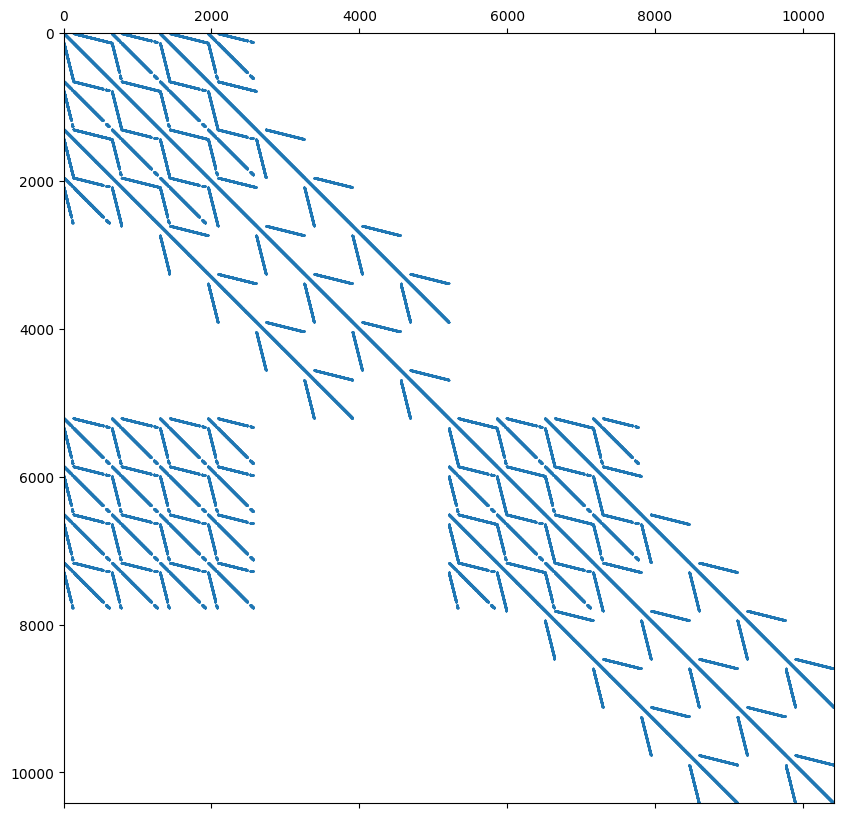

In [ ]:
plt.figure(figsize=(10, 10))
plt.spy(dpn_prob.assemble_multigroup_system("vacuum",2)[0], markersize=0.4)
